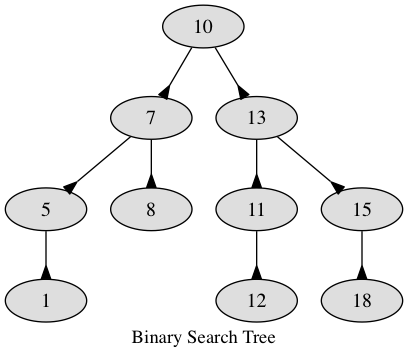

In [60]:
#avl tree
class treenode():
    def __init__(self,value):
        self.value = value
        self.Lchild = None
        self.Rchild = None
        self.parent = None
        self.b_factor = None
    
    def __repr__(self):
            return '(%d, Bfactor: %d)' % (self.value,self.b_factor)        

class avl_tree():
    def __init__(self):
        self.root = None
        
    def insert(self,value):
        if self.root == None:
            self.root = treenode(value)
        else:
            self.insert_rec(self.root,value)
            self.get_Bfactor()
            unNode = self.root
            # case1 LL
            if unNode.b_factor > 1 and value < unNode.Lchild.value:
                self.root = self.Rrotate(unNode)
                return self.root #return can break and return value
            #case2 RR
            if unNode.b_factor < -1 and value > unNode.Rchild.value:
                self.root = self.Lrotate(unNode)
                return self.root
            #case3 LR
            if unNode.b_factor > 1 and value > unNode.Lchild.value:
                unNode.Lchild = self.Lrotate(unNode.Lchild)
                self.root = self.Rrotate(unNode)
                return self.root
            #case4 RL
            if unNode.b_factor < -1 and value < unNode.Rchild.value:
                unNode.Rchild = self.Rrotate(unNode.Rchild)
                self.root = self.Lrotate(unNode)
                return self.root
                        
    def insert_rec(self,cur_node,value):
        #for calling recursive function
        if value < cur_node.value:
            if cur_node.Lchild:
                self.insert_rec(cur_node.Lchild,value)   
            else:
                cur_node.Lchild = treenode(value)
                cur_node.Lchild.parent = cur_node                
                
        elif value > cur_node.value: 
            if cur_node.Rchild:
                self.insert_rec(cur_node.Rchild,value)    
            else:
                cur_node.Rchild = treenode(value)
                cur_node.Rchild.parent = cur_node
        elif value == cur_node.value:
            print('value: '+str(value)+' has already existed in the tree.')    
        
    
    #---------fuction set-----------
    #balance factor
    def get_Bfactor(self):
        quene = [] #traverse each node and calculate bfactor
        if self.root == None:
            return
        else:
            quene.append(self.root)
        while len(quene) > 0:
            quene[0].b_factor = self.height(quene[0].Lchild) -\
                                self.height(quene[0].Rchild)
                
            node = quene.pop(0)
            #enquene left child
            if node.Lchild:
                quene.append(node.Lchild)
            #enquene right child
            if node.Rchild:
                quene.append(node.Rchild)              
    
    #height (recursion)     
    def height(self,cur_node):
        if cur_node == None:
            return 0
        else:
            Lheight = self.height(cur_node.Lchild)
            Rheight = self.height(cur_node.Rchild)
            
            if Lheight > Rheight:
                return Lheight + 1
            else:
                return Rheight + 1          
    
    #left-rotate
    def Lrotate(self,cur_node):
        y = cur_node.Rchild
        t2 = y.Lchild
        #perform rotation
        cur_node.Rchild = t2
        if t2:
            t2.parent = cur_node
            
        y.Lchild = cur_node
        cur_node.parent = y
        y.parent = None
        return y 
    
    #right-rotate
    def Rrotate(self,cur_node):
        y = cur_node.Lchild
        t2 = y.Rchild
        #perform rotation
        cur_node.Lchild = t2
        if t2:
            t2.parent = cur_node
            
        y.Rchild = cur_node
        cur_node.parent = y
        y.parent = None
        return y   
            
    #----- using level order traversal ------
    def plot(self):
        import pydot 
        graph = pydot.Dot(graph_type='graph',label='Binary Search Tree')
        graph.set_node_defaults(shape='ellipse',fontsize=15,
                                height=.45, width=.85,
                                style='filled', fillcolor='gray87')    
        #empty quene for level order traversal
        quene = []
        if self.root == None:
            return
        else:
            quene.append(self.root)

        while len(quene) > 0:
            #add new node
            new_node = pydot.Node(name= str(quene[0].value))
            graph.add_node(new_node) 
            # set parent node (if the new node not the root)
            if quene[0].parent:
                new_node_par = pydot.Node(name= str(quene[0].parent.value))
                graph.add_node(new_node_par) 
                graph.add_edge(pydot.Edge(new_node_par,new_node,
                                         dir ="forward",arrowhead='inv',penwidth=1))
            
            node = quene.pop(0)
            #enquene left child
            if node.Lchild:
                quene.append(node.Lchild)
            #enquene right child
            if node.Rchild:
                quene.append(node.Rchild)    
                           
        #setting graph            
        graph.write_png('binarytreetest.png')
        import IPython.display as dis
        image = dis.Image('binarytreetest.png')
        dis.display(image)                
#-------------------------------------    
a =  avl_tree()       
list = [7,15,13,18,10,11,5,8,1,12]
for i in list:
    a.insert(i) 
a.plot()    
